In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Loading Mask RCNN
net = cv2.dnn.readNetFromTensorflow("dnn/frozen_inference_graph_coco.pb","dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt")

# Generate random colors
colors = np.random.randint(0, 255, (80, 3))

print(colors)

# Load image
img = cv2.imread("image.jpg")
height, width, _ = img.shape

# Create black image
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (100, 100, 0)

# Detect objects
blob = cv2.dnn.blobFromImage(img, swapRB=True)
net.setInput(blob)

boxes, masks = net.forward(["detection_out_final", "detection_masks"])
detection_count = boxes.shape[2]

for i in range(detection_count):
    box = boxes[0, 0, i]
    class_id = box[1]
    score = box[2]
    if score < 0.3:
        continue

# Get box Coordinates
    x = int(box[3] * width)
    y = int(box[4] * height)
    x2 = int(box[5] * width)
    y2 = int(box[6] * height)

    roi = black_image[y: y2, x: x2]
    roi_height, roi_width, _ = roi.shape

# Get the mask
    mask = masks[i, int(class_id)]
    mask = cv2.resize(mask, (roi_width, roi_height))
    _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

    cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 3)

# Get mask coordinates
    contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    color = colors[int(class_id)]
    for cnt in contours:
        cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))



[[243  34 137]
 [200 140   4]
 [181 148  65]
 [181  59   1]
 [204  55  44]
 [ 64 134  10]
 [249  29  40]
 [243 180 244]
 [142 148   4]
 [  2 196 111]
 [105  55  44]
 [138 186  57]
 [233  56 227]
 [ 96 254  38]
 [189 137 173]
 [ 51 130 174]
 [172   3 111]
 [ 10 113 226]
 [145  63  34]
 [ 18 163  72]
 [ 44  96 154]
 [ 93 233 180]
 [197 127 117]
 [ 35  41  15]
 [ 57  79 190]
 [111  83 191]
 [ 54  82  19]
 [209 237 248]
 [ 50 122 120]
 [199 244 128]
 [ 27 229  76]
 [229  31 195]
 [  4  62 204]
 [ 68 134 170]
 [252 241  81]
 [  5  85 179]
 [141  33 237]
 [245 244 250]
 [ 48  47  69]
 [ 59 105 108]
 [111 155 229]
 [171  19  26]
 [132 183 163]
 [164 216 185]
 [152   4 106]
 [ 15 247 244]
 [ 71  30  94]
 [210 133 163]
 [ 64  91 148]
 [ 29  17  13]
 [130  42 106]
 [163  87 175]
 [187 249  48]
 [ 34 162  88]
 [165  82 164]
 [113  13  73]
 [187 159 179]
 [249   2 232]
 [188 243  87]
 [235  35  18]
 [126 150  10]
 [253 161 239]
 [157  75 118]
 [ 16 226 101]
 [ 59 216  24]
 [  7 207 219]
 [ 92 167 

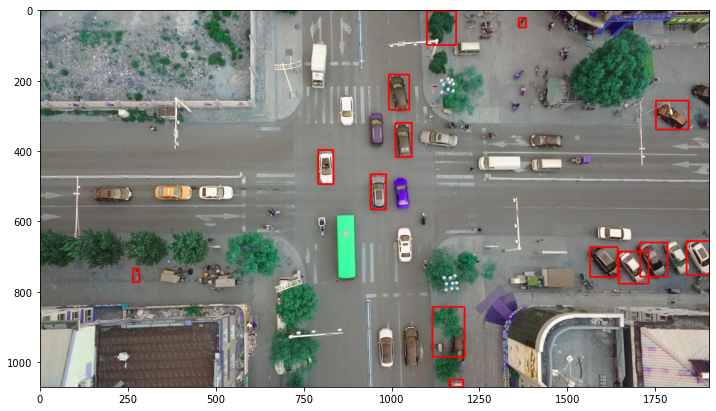

In [31]:
plt.figure(figsize= (12,12))
plt.imshow( img)

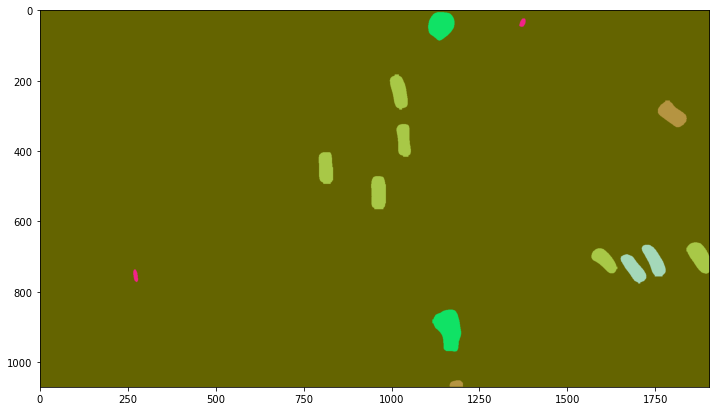

In [32]:
plt.figure(figsize= (12,12))
plt.imshow( black_image)